<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/densenet121%20Train%2BInference%20(ImageNet%20statistics%2C%20pretrained%2C%20full).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Oct  7 17:50:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -uq "/content/drive/MyDrive/DACON_2021_recognize_traffic_signal_motion/new_open.zip" -d "/content/"

In [4]:
!cp /content/drive/MyDrive/pytorch_python/dataset.py .
!cp /content/drive/MyDrive/pytorch_python/specific_augmentation.py .
!cp /content/drive/MyDrive/pytorch_python/specific_dataset.py .
!cp /content/drive/MyDrive/pytorch_python/specific_train.py .
!cp /content/drive/MyDrive/pytorch_python/train.py .

In [5]:
from dataset import *
from train import *

import torch, torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
batch_size = 16

train_transform = transforms.Compose([
    transforms.Resize(256), transforms.RandomCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

val_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [7]:
train_dataset = TrainDataset(transform=train_transform)
val_dataset = ValDataset(transform=val_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [8]:
model = Baseline(model='densenet121', num_classes=len(train_dataset.label_info), print_freq=5, save=True)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

In [9]:
len(train_dataset.label_info)

157

In [10]:
epochs = 5
lr = 0.0005
weight_decay = 0.00001

In [11]:
model.train(train_loader, val_loader, epochs=epochs, lr=lr, weight_decay=weight_decay)

Epoch 1 Started...
Best Model Saved
Iteration : 1 - Train Loss : 5.166707, Test Loss : 5.091580, Train Acc : 0.000000, Test Acc : 2.717391
Best Model Saved
Iteration : 6 - Train Loss : 5.043254, Test Loss : 5.116662, Train Acc : 0.000000, Test Acc : 5.502717
Best Model Saved
Iteration : 11 - Train Loss : 5.739116, Test Loss : 5.293425, Train Acc : 6.250000, Test Acc : 6.657609
Best Model Saved
Iteration : 16 - Train Loss : 5.184428, Test Loss : 5.050179, Train Acc : 12.500000, Test Acc : 8.695652
Best Model Saved
Iteration : 21 - Train Loss : 5.256680, Test Loss : 4.735144, Train Acc : 6.250000, Test Acc : 11.616848
Best Model Saved
Iteration : 26 - Train Loss : 4.398812, Test Loss : 4.536140, Train Acc : 12.500000, Test Acc : 12.228261
Best Model Saved
Iteration : 31 - Train Loss : 4.508106, Test Loss : 4.408340, Train Acc : 6.250000, Test Acc : 11.073370
Best Model Saved
Iteration : 36 - Train Loss : 4.229108, Test Loss : 4.217901, Train Acc : 31.250000, Test Acc : 16.100543
Best Mod

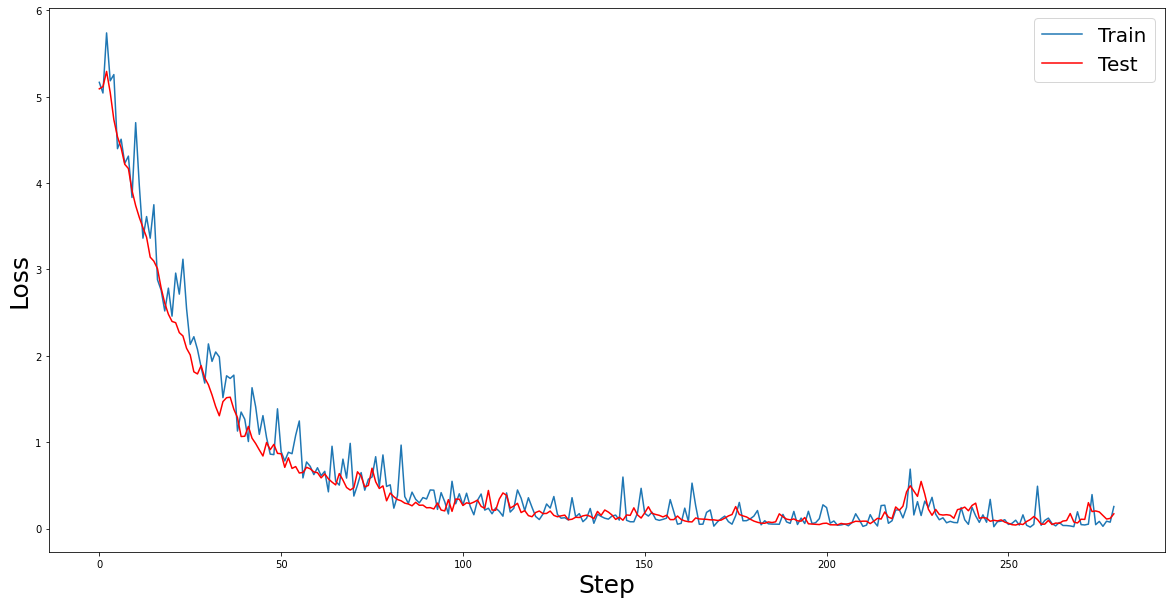

In [12]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(model.train_losses, label='Train')
test_lossline, = plt.plot(model.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

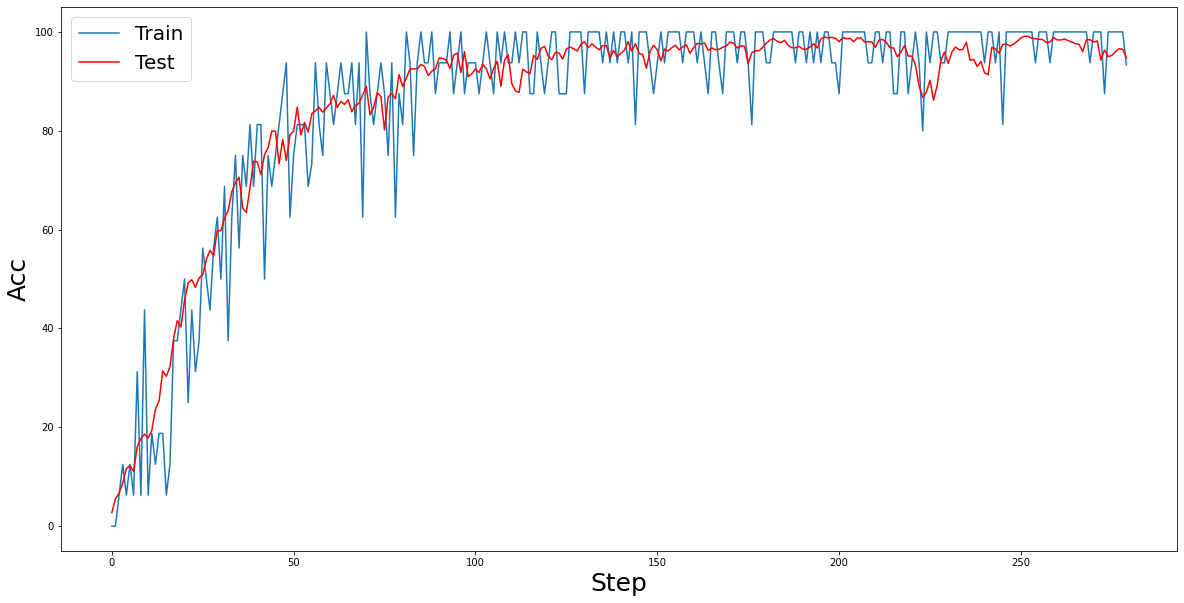

In [13]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(model.train_acc, label='Train')
test_accline, = plt.plot(model.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Acc', fontsize=label_fontsize)
plt.show()

In [14]:
import os, json, PIL
import pandas as pd

In [15]:
model = Baseline(model='densenet121', num_classes=157)
model.model.load_state_dict(torch.load('./4_140.pt'))
model.model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [16]:
test_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

data_dir = './test/'

predictions = []
with torch.no_grad():
    for num in sorted(os.listdir(data_dir)):
        with open(data_dir + '{}/{}.json'.format(num, num), 'r') as j:
            temp = json.load(j)
            imgs = []
            for info in temp['annotations']:
                img_dir = data_dir + '{}/{}.png'.format(num, info['image_id'])
                img = PIL.Image.open(img_dir).convert('RGB')
                img = test_transform(img)
                imgs.append(img)
            imgs = torch.stack(imgs).cuda()
            prediction = torch.nn.Softmax(dim=1)(model.model(imgs))
            prediction = torch.mean(prediction, dim=0)
            #if torch.max(prediction) > 0.9:
            #    prediction[torch.argmax(prediction)] = 1
            #    prediction[prediction < 1] = 0
            
            if torch.sum(prediction) != 1: print(torch.sum(prediction))
            predictions.append(prediction.cpu().numpy())

tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1

In [17]:
print(len(predictions[0]))

157


In [19]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission.iloc[:,1:] = predictions
display(sample_submission.head())
sample_submission.to_csv('./densenet121_ImageNetStat_4_140_threshno.csv', index=False)

,Image_Path,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11,Label_12,Label_13,Label_14,Label_15,Label_16,Label_17,Label_18,Label_19,Label_22,Label_23,Label_25,Label_26,Label_27,Label_28,Label_29,Label_31,Label_32,Label_34,Label_35,Label_36,Label_37,Label_39,Label_40,Label_41,Label_42,Label_43,Label_44,...,Label_142,Label_143,Label_144,Label_145,Label_146,Label_147,Label_148,Label_149,Label_150,Label_151,Label_153,Label_154,Label_155,Label_156,Label_157,Label_158,Label_159,Label_160,Label_161,Label_162,Label_163,Label_165,Label_167,Label_168,Label_169,Label_171,Label_172,Label_173,Label_174,Label_175,Label_177,Label_186,Label_188,Label_189,Label_190,Label_191,Label_192,Label_193,Label_194,Label_195
0,./test\649,6.415449e-01,0.026148,0.000525,4.081049e-05,5.289688e-06,2.641357e-03,3.676572e-02,0.000110,0.000009,9.381610e-05,0.001061,0.000006,0.000161,0.000003,2.474425e-07,2.312908e-06,2.348379e-04,0.000007,0.000010,0.000035,0.003615,2.681717e-04,0.001002,0.001625,0.006129,0.000469,2.007523e-05,9.307514e-06,4.365652e-06,1.571456e-05,0.266335,3.179239e-05,7.097407e-06,0.000008,0.000035,0.000146,0.000901,6.773005e-05,1.256190e-05,...,0.002048,1.029994e-05,8.022627e-06,0.000139,3.589957e-05,1.721976e-05,1.091072e-05,8.153235e-04,1.943862e-05,1.517094e-05,0.000130,1.031931e-05,4.370273e-06,8.646091e-08,5.445315e-07,5.754993e-07,2.332218e-05,0.000293,0.000030,3.324761e-07,0.000033,3.523257e-05,7.963413e-05,9.258834e-05,1.651645e-05,8.164234e-05,1.487809e-05,9.160385e-06,1.482196e-05,3.530485e-06,2.749356e-05,8.705689e-07,3.591789e-08,2.361552e-06,1.751677e-05,2.574770e-05,7.231279e-06,3.048736e-07,2.004497e-06,4.988481e-07
1,./test\650,8.452109e-04,0.000011,0.000002,6.608794e-07,5.011043e-07,5.120609e-06,3.799974e-05,0.000007,0.000001,3.604495e-06,0.973659,0.000079,0.000065,0.000017,3.018917e-07,9.343484e-05,1.860853e-02,0.000017,0.000003,0.000005,0.000023,5.247766e-06,0.000026,0.000002,0.000032,0.000019,2.092731e-05,9.900021e-07,3.526530e-06,3.837118e-06,0.000017,4.744615e-06,1.138630e-06,0.000005,0.000002,0.000009,0.002720,4.330352e-06,4.042327e-06,...,0.000004,2.656418e-05,1.562892e-06,0.000001,1.782196e-06,1.669501e-07,2.662168e-06,4.505899e-06,2.395534e-07,2.839191e-07,0.000005,8.430605e-07,3.895623e-07,5.111441e-08,1.193037e-07,5.829648e-08,1.471605e-06,0.000010,0.000016,2.838133e-07,0.000004,7.183595e-08,4.129895e-06,2.519815e-05,5.173879e-06,1.105233e-06,2.977074e-07,2.069538e-07,2.257734e-06,1.494573e-07,1.439292e-07,8.759877e-07,3.822759e-08,8.800275e-07,2.062642e-06,7.439433e-07,2.031234e-07,1.199709e-07,2.837227e-08,1.774370e-07
2,./test\651,2.225192e-05,0.046345,0.001554,3.962767e-05,2.204588e-06,1.335875e-05,3.670340e-06,0.004791,0.000152,8.523637e-07,0.000920,0.750152,0.079856,0.000651,1.714474e-06,1.536130e-06,2.371257e-05,0.043475,0.000118,0.000005,0.000023,2.011028e-05,0.000014,0.000006,0.000336,0.000022,7.373864e-06,6.105168e-06,1.353688e-06,3.899623e-06,0.000012,1.083553e-05,6.192129e-07,0.000007,0.029701,0.000161,0.000037,8.733563e-06,8.525472e-06,...,0.000090,4.279188e-07,3.431568e-06,0.000001,5.494554e-06,7.715596e-06,1.911497e-05,5.835740e-05,1.201318e-05,1.007430e-06,0.000031,1.721002e-05,1.471917e-05,2.498097e-07,9.081700e-07,2.310982e-07,1.340309e-05,0.000006,0.000058,8.077813e-07,0.000003,3.532338e-05,9.092123e-06,4.920783e-06,4.115480e-06,2.199188e-06,3.263700e-06,1.755859e-06,8.313735e-07,4.884114e-07,1.166615e-06,2.600204e-07,2.944783e-07,7.704148e-07,4.366178e-06,2.327644e-07,1.317554e-07,7.367603e-08,1.459517e-06,1.215199e-07
3,./test\652,1.293357e-05,0.039358,0.000897,1.029560e-05,3.456256e-07,3.776238e-06,1.273862e-06,0.005236,0.000063,4.940995e-07,0.000784,0.874333,0.047057,0.000256,1.370186e-07,7.349231e-07,7.019394e-06,0.025435,0.000022,0.000002,0.000006,4.294726e-06,0.000008,0.000002,0.000125,0.000008,1.939402e-06,8.894639e-07,3.549988e-07,9.923995e-07,0.000003,2.426166e-06,1.824995e-07,0.000002,0.002561,0.000040,0.000003,7.431916e-07,2.200846e-06